# Power Transformer 101
## By: Patrick L. Cavins 

### This notebook was developed to be used with lighting talk 

## What? 

### Powertransformer is part of sklearn preprocessing module


### The individual transformers can be found inside the SciPy stats module

- The key part of this technique is found right in the name **TRANSFORM** 
- Two data transformers are inside this module 
    - Box-Cox Transformation (will take in **ONLY** positive values) 
    - Yeo Johnson Transformation (can take in **BOTH** positive and negative values) 
    - What about 0? 
        - She ain't no hero here... 
    
    
![alt text](boxcox_beforeafter.png "Title")    

# The Math 

## Lambda can be between -5 and 5

## The Confidence Interval is important! 

![alt text](math_boxcox.png "Title")

In [1]:
#Libraries needed for this demonstration

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import PowerTransformer
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline 

## A Quick Demo

In [2]:
# Import the Data, in this case AMES Housing Data. We are only working with one-column 
df = pd.read_csv('./train.csv')

df['Garage Area'].head(10)


0    475.0
1    559.0
2    246.0
3    400.0
4    484.0
5    578.0
6    525.0
7    531.0
8    420.0
9    504.0
Name: Garage Area, dtype: float64

## Import the data and some quick EDA 

In [3]:
#Load the Data
df = pd.read_csv('./train.csv')

#Checking for Nulls / EDA 
nulls = df['Garage Area'].isnull().sum()
print (f'The numbers of nulls: {nulls}')

#Replace the Null with 0 
df['Garage Area'] = df['Garage Area'].replace(np.nan, 0)
nulls = df['Garage Area'].isnull().sum()
print (f'The numbers of nulls: {nulls}')

#Drop Zeros from the pd.series (if zero we can assume that a garage is not around) 
garage_area = df['Garage Area']
garage_area = garage_area[garage_area != 0]

garage_area = np.asarray(df['Garage Area'])

The numbers of nulls: 1
The numbers of nulls: 0


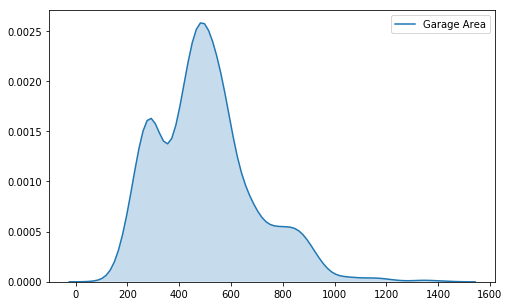

In [4]:
# We can see that this data is screwed, and does not represent a normal distribution 

plt.figure(figsize=(8,5))
sns.kdeplot(garage_area, shade=True);

In [5]:
# Values in the Box-Cox Transformation
# xt = (x**lambda - 1) / lambda 

# define the set of lambda's that we want to search over
lmbda = np.linspace(start = .1, stop = 1.0, num=4) 

xt = []
lambda_list = []
for i in lmbda: 
    #x = the input data 
    x = garage_area 
    #box-cox transformation 
    transform = (x**i - 1) / i
    #appending the list 
    xt.append(transform)

In [6]:
print ('These are the tranformed values, Box-Cox Transformation for a given Lambda')
print ('--'*50)
print (xt[1]) # we can grab the individual values 
print ('--'*50)
print ('These are the lambdas which we used in this transformation')
print (lmbda) # this is the list of lambda's we generated 

These are the tranformed values, Box-Cox Transformation for a given Lambda
----------------------------------------------------------------------------------------------------
0       26.918292
1       28.898199
2       20.110702
3       24.964014
4       27.139997
5       29.320804
6       28.119897
7       28.259397
8       25.505267
9       27.623971
10      20.758493
11      30.478192
12      29.276715
13      27.041769
14      30.014115
15      30.310575
16      27.838001
17      27.041769
18      28.189766
19      30.099231
20      26.288896
21      27.504074
22      29.254637
23      25.505267
24      29.188262
25      28.236213
26      23.113901
27      19.888475
29      29.276715
30      28.512710
          ...    
2018    26.794032
2019    24.964014
2020    26.843831
2021    29.188262
2022    28.466884
2023    27.139997
2024    28.695007
2025    31.297744
2026    20.758493
2028    27.719376
2029    35.822615
2030    24.519201
2031    27.528111
2032    26.868683
2033    28.259

In [42]:
print (lmbda)

[0.1 0.4 0.7 1. ]


## The lambda has **HUGE** effect on the distrubtion of the data 

(0, 300)

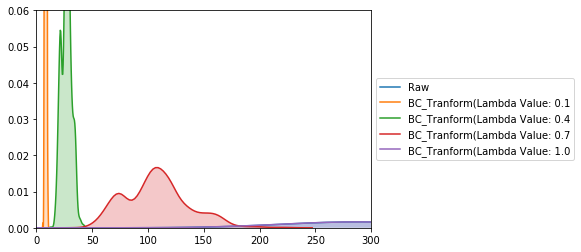

In [7]:
sns.kdeplot(garage_area, shade=True, label="Raw")
sns.kdeplot(xt[0], shade=True, label= f"BC_Tranform(Lambda Value: {round(lmbda[0],3)}")
sns.kdeplot(xt[1], shade=True, label= f"BC_Tranform(Lambda Value: {round(lmbda[1],3)}")
sns.kdeplot(xt[2], shade=True, label= f"BC_Tranform(Lambda Value: {round(lmbda[2],3)}")
sns.kdeplot(xt[3], shade=True, label= f"BC_Tranform(Lambda Value: {round(lmbda[3],3)}")

# set the legend location
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# control x and y limits
plt.ylim(0, 0.06)
plt.xlim(0, 300)


## The trick of Box-Cox transformation is to find lambda value...

However in practice this is quite affordable. The following function returns the transformed variable, lambda value, confidence interval for lambda according to certain alpha level (default = 0.05). 

- garage_area_xt: transformed variable
- maxlog: lambda
- interval: confidence interval

- http://dataunderthehood.com/2018/01/15/box-cox-transformation-with-python/

In [8]:
garage_area_xt, maxlog, interval = stats.boxcox(garage_area, alpha=0.95)

print (maxlog)
print (interval)
print (garage_area_xt)

0.24792608131353974
(0.24473436887437894, 0.2511178630801074)
[14.55741946 15.32330694 11.759115   ... 13.10330888 12.47267747
 14.22848179]


## The change is so dramatic you cannot visualize it on a single graph, easily

Text(0.5, 1.0, 'Comparing the Raw Input to the Transformed Output')

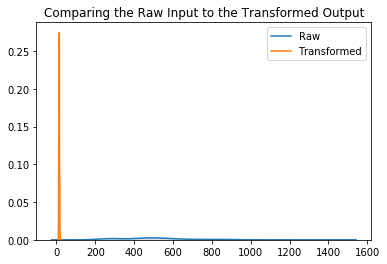

In [9]:
# Changes in the KDE... 
sns.kdeplot(garage_area, shade=True, label="Raw")
sns.kdeplot(garage_area_xt, shade=True, label="Transformed")
plt.title('Comparing the Raw Input to the Transformed Output')

## Data normalization, ZScore or MinMax Scaler

188.33831460464728


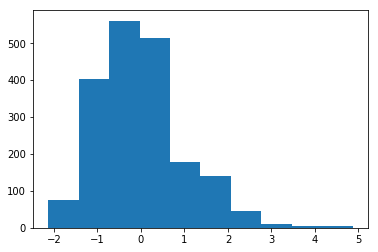

In [10]:
## Z-Score (garage area)

garage_area_std = np.std(garage_area)

print (garage_area_std)

garage_area_Z = ((garage_area -garage_area.mean()) / (garage_area_std)) 

# plot a histogram
plt.hist(garage_area_Z);

1.7504650366539487


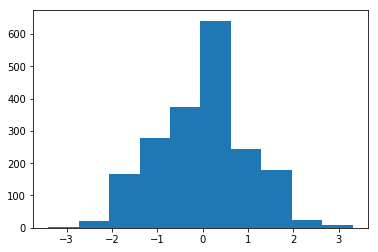

In [11]:
## Z-Score (garage area_xt)

garage_area_xt_std = np.std(garage_area_xt)

print (garage_area_xt_std)

garage_area_xt_Z = ((garage_area_xt - garage_area_xt.mean()) / (garage_area_xt_std))

# plot a histogram 
plt.hist(garage_area_xt_Z);

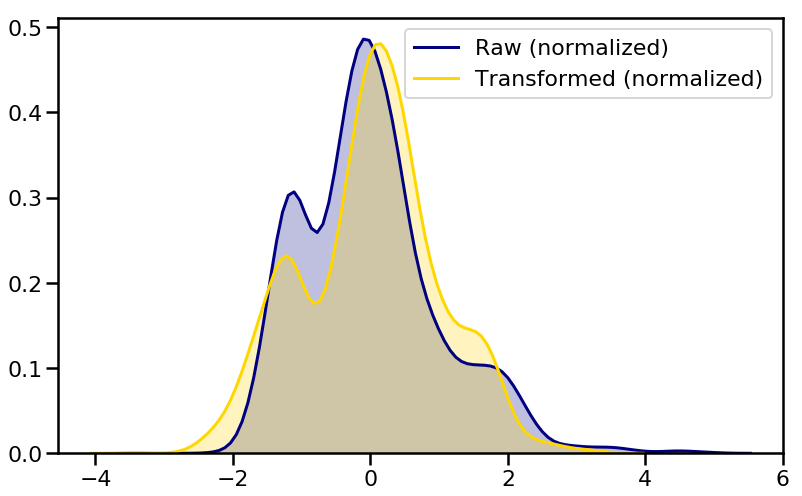

In [13]:
# Changes in the KDE!  
plt.figure(figsize=(13,8))
sns.set_context('poster')
sns.kdeplot(garage_area_Z, shade=True, color='navy', label="Raw (normalized)")
sns.kdeplot(garage_area_xt_Z, shade=True, color='gold', label="Transformed (normalized)")

## Using the Sklearn Module

In [38]:
# Let's use two features...

print (df['Lot Area'].min())

1300


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


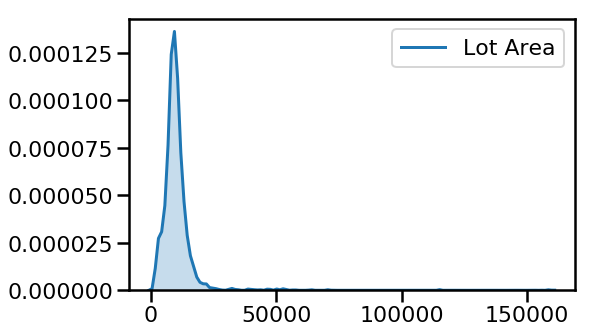

In [39]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['Lot Area'], shade=True)

In [14]:
#Features 
x = df[['Garage Area', 'Lot Area']]

## Instantiate PowerTransformer 


### Parameters 

**method** : str, (default=’yeo-johnson’)

**standardize** : boolean, default=True
Set to True to apply zero-mean, unit-variance normalization to the transformed output.

### Attributes

**lambdas_**: array of float, shape (n_features,)
The parameters of the power transformation for the selected features.

In [16]:
pt = PowerTransformer(method='yeo-johnson', standardize=True,) 

#Fit the data to the powertransformer
skl_yj = pt.fit(x)

In [17]:
#Here are the lambdas 
skl_yj.lambdas_

array([0.80353634, 0.15891886])

In [18]:
#Transform 
skl_yj = pt.transform(x)

In [23]:
lot_area = np.asarray(df['Lot Area'])

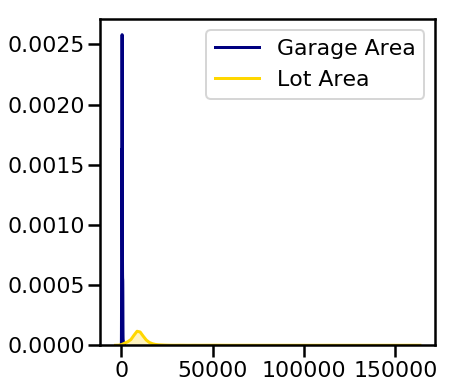

In [27]:
plt.figure(figsize=(6,6))
sns.set_context('poster')
sns.kdeplot(garage_area, shade=True, color='navy', label="Garage Area")
sns.kdeplot(lot_area, shade=True, color='gold', label="Lot Area")

# control x and y limits
# plt.ylim(0, 0.06)
# plt.xlim(0, 20_000)

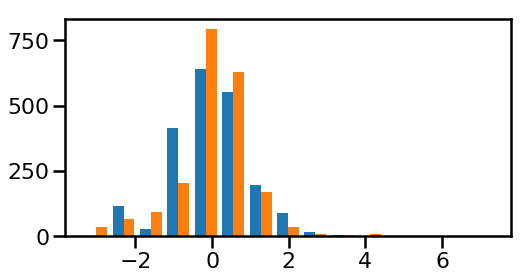

In [22]:
plt.figure(figsize=(8,4))
plt.hist(skl_boxcox, bins=15);

## Good Tidbits:

"Box-cox transformation is a statistical technique used to remove heteroscedasticity of a variable and also make it look like more normally distributed, which represents a big deal for statisticians and economists regarding normality and homoscedasticity assumptions for linear models."

http://dataunderthehood.com/2018/01/15/box-cox-transformation-with-python/



"For example, the data may have a skew, meaning that the bell in the bell shape may be pushed one way or another."

https://machinelearningmastery.com/how-to-transform-data-to-fit-the-normal-distribution/



"But, generally the answer is that for most meaningful analysis, you need the same 𝜆 value for all datasets. The reason is that the Box-Cox transformation **not only changes the scale of the data, it also changes the unit of measurement**. "

https://stats.stackexchange.com/questions/243975/skewness-transformation-for-one-but-not-the-other-variable/243984#243984

https://stats.stackexchange.com/questions/243975/skewness-transformation-for-one-but-not-the-other-variable/243984#243984

#### References: 

http://www.kmdatascience.com/2017/07/box-cox-transformations-in-python.html

    